In [1]:
import os
from tqdm.notebook import tqdm
os.system("export AUTOGRAPH_VERBOSITY=0")

0

In [2]:
import tensorflow as tf
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt

%matplotlib inline

/home/codekage/.local/lib/python3.6/site-packages/tensorflow/python/framework/dtypes.py:516: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint8 = np.dtype([("qint8", np.int8, 1)])
/home/codekage/.local/lib/python3.6/site-packages/tensorflow/python/framework/dtypes.py:517: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_quint8 = np.dtype([("quint8", np.uint8, 1)])
/home/codekage/.local/lib/python3.6/site-packages/tensorflow/python/framework/dtypes.py:518: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint16 = np.dtype([("qint16", np.int16, 1)])
/home/codekage/.local/lib/python3.6/site-packages/tensorflow/python/framework/dtypes.

In [3]:
tf.enable_eager_execution()

In [4]:
train = pd.read_csv("./train.csv")
labels = pd.get_dummies(train.pop("label")).values
train = train.values / 255

In [5]:
graph = tf.Graph()
sess = tf.Session(graph=graph)

In [6]:
class Net(tf.keras.Model):
    def __init__(self,):
        super(Net,self).__init__()
        self.conv1 = tf.layers.Conv2D(32,3,activation="relu",input_shape=(28,28,1))
        self.conv2 = tf.layers.Conv2D(32,3,activation="relu",)
        self.pool = tf.layers.MaxPooling2D(2,1)
        self.conv3 = tf.layers.Conv2D(32,3,activation="relu")
        self.flat = tf.layers.Flatten()
        self.dense1 = tf.layers.Dense(1024,activation="relu")
        self.out = tf.layers.Dense(10)
            
    def call(self,x):
        x = tf.cast(x,tf.float32)
        x = self.conv1(x)
        x = self.conv2(x)
        x = self.pool(x)
        x = self.conv3(x)
        x = self.flat(x)
        x = self.dense1(x)
        x = self.out(x)
        x = tf.nn.softmax(x)
        return x
    

In [7]:
def dataset():
    X,Y = train.copy().reshape(-1,4200,28,28,1),labels.reshape(-1,4200,10).astype(np.float32)
    for batch in zip(X,Y):
        yield batch

In [8]:
def step(model,x,y,loss_func):
    with tf.GradientTape() as tape:
        loss = loss_func(y,model(x))
    return loss, tape.gradient(loss,model.trainable_variables)

In [9]:
cate_ce= tf.keras.losses.CategoricalCrossentropy()

In [44]:
net = Net()

In [45]:
learning_rate = 0.001
opt = tf.keras.optimizers.Adam(learning_rate=learning_rate,epsilon=1e-6)

In [46]:
for epoch in range(5):
    data = dataset()
    for batch in data:
        loss,grads = step(net,*batch,cate_ce)
        opt.apply_gradients(zip(grads,net.trainable_variables));

    opt = tf.keras.optimizers.Adam(learning_rate=learning_rate)
    print (f"Epoch : {epoch}, Loss : {loss.numpy()}")

Epoch : 0, Loss : 0.4350033402442932
Epoch : 1, Loss : 0.5095071196556091
Epoch : 2, Loss : 0.15613985061645508
Epoch : 3, Loss : 0.1579044908285141
Epoch : 4, Loss : 0.07864851504564285


In [49]:
net(train[1].reshape(1,28,28,1)).numpy().argmax()

0

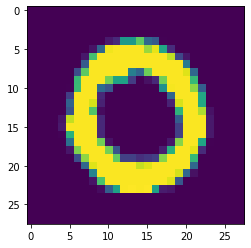

In [51]:
plt.imshow(train[1].reshape(28,28))

In [52]:
net.layers

In [ ]:
for grad,var in zip(grads,net.trainable_variables):
    print (grad.numpy().shpe)